# 로지스틱 회귀
## 럭키백의 확률

In [2]:
import pandas as pd  # pandas 라이브러리 불러오기

fish = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fish.csv')  # 데이터셋 읽기
fish.head()  # 데이터의 처음 5행 출력

Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

In [3]:
print(pd.unique(fish['Species']))  # 'Species' 열의 고유 값 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()  # 입력 데이터 배열로 변환

In [5]:
print(fish_input[:5])  # 입력 데이터의 처음 5행 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish_target = fish['Species'].to_numpy()  # 타깃 데이터 배열로 변환

In [7]:
from sklearn.model_selection import train_test_split  # train/test 분할 함수 불러오기

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42  # 입력, 타깃 데이터 분할 (랜덤 시드 고정)
)

In [8]:
from sklearn.preprocessing import StandardScaler  # 표준화 도구 불러오기

ss = StandardScaler()  # 표준화 객체 생성
ss.fit(train_input)  # 훈련 데이터로 표준화 학습
train_scaled = ss.transform(train_input)  # 훈련 데이터 표준화
test_scaled = ss.transform(test_input)  # 테스트 데이터 표준화

## k-최근접 이웃 분류기의 확률 예측

In [9]:
from sklearn.neighbors import KNeighborsClassifier  # k-최근접 이웃 분류기 불러오기

kn = KNeighborsClassifier(n_neighbors=3)  # 이웃 개수 3으로 설정
kn.fit(train_scaled, train_target)  # 모델 훈련

print(kn.score(train_scaled, train_target))  # 훈련 세트 정확도 출력
print(kn.score(test_scaled, test_target))  # 테스트 세트 정확도 출력

0.8907563025210085
0.85


In [10]:
print(kn.classes_)  # 분류 클래스(종류) 출력

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
print(kn.predict(test_scaled[:5]))  # 테스트 데이터 앞 5개 샘플 예측 결과 출력

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


## 로지스틱 회귀

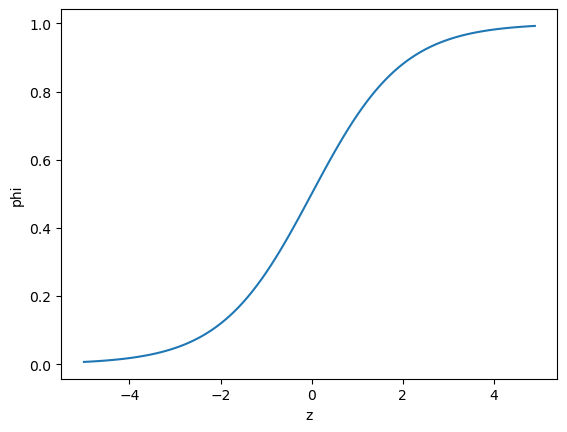

In [12]:
import numpy as np  # numpy 불러오기
import matplotlib.pyplot as plt  # matplotlib 시각화 라이브러리 불러오기

z = np.arange(-5, 5, 0.1)  # -5부터 5까지 0.1 간격의 배열 생성
phi = 1 / (1 + np.exp(-z))  # 시그모이드 함수 적용

plt.plot(z, phi)  # 시그모이드 함수 그래프 그리기
plt.xlabel('z')  # x축 레이블
plt.ylabel('phi')  # y축 레이블
plt.show()  # 그래프 출력

## 로지스틱 회귀로 이진 분류 수행하기

In [13]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])  # 문자 배열 생성
print(char_arr[np.array([True, False, True, False, False])])  # True인 인덱스만 선택하여 출력

['A' 'C']


In [14]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')  # 도미 또는 빙어인 샘플 인덱스
train_bream_smelt = train_scaled[bream_smelt_indexes]  # 도미/빙어 샘플만 추출
target_bream_smelt = train_target[bream_smelt_indexes]  # 도미/빙어 타깃만 추출

In [15]:
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 불러오기

lr = LogisticRegression()  # 로지스틱 회귀 모델 생성
lr.fit(train_bream_smelt, target_bream_smelt)  # 모델 훈련

LogisticRegression()

In [16]:
print(lr.predict(train_bream_smelt[:5]))  # 훈련 데이터 앞 5개 샘플 예측 결과 출력

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [17]:
print(lr.predict_proba(train_bream_smelt[:5]))  # 훈련 데이터 앞 5개 샘플의 예측 확률 출력

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [18]:
print(lr.classes_)  # 분류 클래스(종류) 출력

['Bream' 'Smelt']


In [19]:
print(lr.coef_, lr.intercept_)  # 모델의 계수와 절편 출력

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [20]:
decisions = lr.decision_function(train_bream_smelt[:5])  # 결정 함수 값 계산
print(decisions)  # 결정 함수 값 출력

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [22]:
from scipy.special import expit  # 시그모이드 함수 불러오기

print(expit(decisions))  # 결정 함수 값을 시그모이드 함수에 통과시켜 확률로 변환 후 출력

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


## 로지스틱 회귀로 다중 분류 수행하기

In [24]:
lr = LogisticRegression(C=20, max_iter=1000) # 정규화 강도를 높이고 최대 반복 횟수를 늘린 로지스틱 회귀 모델 생성
lr.fit(train_scaled, train_target)  # 전체 훈련 데이터로 모델 훈련

print(lr.score(train_scaled, train_target)) # 훈련 세트 정확도 출력
print(lr.score(test_scaled, test_target)) # 테스트 세트 정확도 출력

0.9327731092436975
0.925


In [28]:
proba = lr.predict_proba(test_scaled[:5])  # 테스트 데이터 앞 5개 샘플의 예측 확률 계산
print(np.round(proba, decimals=3)) # 소수점 3자리로 반올림하여 출력

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [29]:
print(lr.classes_)  # 분류 클래스(종류) 출력

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [31]:
print(lr.coef_.shape, lr.intercept_.shape) # 계수와 절편의 형태 출력

(7, 5) (7,)


In [32]:
decision = lr.decision_function(test_scaled[:5])  # 테스트 데이터 앞 5개 샘플의 결정 함수 값 계산
print(np.round(decision, decimals=2))  # 결정 함수 값을 소수점 2자리로 반올림하여 출력

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [34]:
from scipy.special import softmax  # 소프트맥스 함수 불러오기

proba = softmax(decision, axis=1)  # 결정 함수 값을 소프트맥스 함수에 통과시켜 확률로 변환
print(np.round(proba, decimals=3))  # 소수점 3자리로 반올림하여 출력

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
